## What is **Churn**?

In simple words, it's the case of losing regular customers suddenly.

Customer churn could happen for various reasons, such as dissatisfaction, switching to competitors, or a change in personal cicrumstances.

So to summarize it with a defenition, `Churn Analysis` is the evaluation of the loss rate in a business.

## Churn Analysis
Importance of churn analysis lies in:
1. **Problem Identification**: Through studying how people use the product, we can identify issues that lead people to leave the product.

2. **Strategic Decision Making**: By analyzing customer churn, we can refine mareting strategies, pricing, and tailor products or services to meet customer expectations.
3. **Customer Retention**: Avoiding losing existing customers is more cost-effective than brining new ones. Churn analysis enhances customer loyalty and long-term porfitability.
4. **Compeitive Edge**: Engaging in churn analysis helps in knowing why customers leave. Knowing this enhance offerings and customer experience allowing companies to stay ahead in a crowded marketplace.
5. **Resource Optimization**: Optimizing Resources by focusing effors on retaining high-value customers.

## Project's Aim:
Detecting churn through:
### Data Analysis:
Analyzing customer data, behavior and feedback to identify patterns that indicate churn.
### Machine Learning Models:
Predictive models using ML algorithms helps identifying churners based on historical data.

## Data Overview
### Demographics
0. customerID

1. **gender**: The customer’s gender: `Male, Female`
2. **SeniorCitizen**: Indicates if the customer is 65 or older: `Yes, No`
3. **Partner** (Married): Indicates if the customer is married: `Yes, No`
4. **Dependents**: Indicates if the customer lives with any dependents: `Yes, No`. Dependents could be children, parents, grandparents, etc.
5. **tenure**: Indicates the `total amount of months` that the customer has been with the company by the end of the quarter specified above.

### Services
6. **PhoneService**: Indicates if the customer subscribes to home phone service with the company: `Yes, No`

7. **MultipleLines**: Indicates if the customer subscribes to multiple telephone lines with the company: `Yes, No / No phone service`
8. **InternetService**: Indicates if the customer subscribes to Internet service with the company: `No, DSL, Fiber Optic, Cable`.

9. **OnlineSecurity**: Indicates if the customer subscribes to an additional online security service provided by the company: `Yes, No / No internet service`
10. **OnlineBackup**: Indicates if the customer subscribes to an additional online backup service provided by the company: `Yes, No / No internet service`
11. **DeviceProtection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: `Yes, No / No internet service`
12. **TechSupport**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: `Yes, No / No internet service`
13. **StreamingTV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: `Yes, No / No internet service`. The company does not charge an additional fee for this service.
14. **StreamingMovies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: `Yes, No / No internet service`. The company does not charge an additional fee for this service.

### Account Info
15. **Contract**: Indicates the customer’s current contract type: `Month-to-Month, One Year, Two Year`.
16. **PaperlessBilling**: Indicates if the customer has chosen paperless billing: `Yes, No`
17. **PaymentMethod**: Indicates how the customer pays their bill: `Bank Withdrawal, Credit Card, Mailed Check`

18. **MonthlyCharges**: Indicates the customer’s current total `monthly charge` for all their services from the company.
19. **TotalCharges**: Indicates the customer’s `total charges`, calculated to the end of the quarter specified above.

### Target Column
20. **Churn**: Customers who left within the last month: `Yes, No`

# Data Analysis and Exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (9, 6)
mypaleete = sns.hls_palette(15)
mypaleete

[(0.86, np.float64(0.3712), 0.33999999999999997),
 (0.86, np.float64(0.5791999999999999), 0.33999999999999997),
 (0.86, np.float64(0.7872), 0.33999999999999997),
 (np.float64(0.7247999999999999), 0.86, 0.33999999999999997),
 (np.float64(0.5167999999999999), 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, np.float64(0.3712)),
 (0.33999999999999997, 0.86, np.float64(0.5792000000000002)),
 (0.33999999999999997, 0.86, np.float64(0.7872000000000001)),
 (0.33999999999999997, np.float64(0.7247999999999999), 0.86),
 (0.33999999999999997, np.float64(0.5167999999999999), 0.86),
 (np.float64(0.3712), 0.33999999999999997, 0.86),
 (np.float64(0.5791999999999999), 0.33999999999999997, 0.86),
 (np.float64(0.7871999999999999), 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, np.float64(0.7247999999999996)),
 (0.86, 0.33999999999999997, np.float64(0.5167999999999995))]

In [2]:
#loading data 
df = pd.read_csv('telecom_churn.csv')


## Data Inspection

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**The data set includes information about:**
* **Customers who left within the last month** – the column is called Churn

* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* **Demographic info about customers** – gender, age range, and if they have partners and dependents

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


here i notice  that TotalCharges should be int or float ...   

In [6]:
df.columns.values 

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

## Data Cleaning

In [7]:
df["customerID"].duplicated().sum()


np.int64(0)

In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df = df.drop("customerID", axis=1)  # we dont need it 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
#we can although change the data type of the total charge 
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors='coerce')
df.isna().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After we covert it we find null values , now we need to fix it

In [11]:
#  i choose Droping the nulls beacuse 11 rows will not affect the data 
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [12]:
df.isna().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df["SeniorCitizen"]
 

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7032, dtype: int64

The values here should be `YES` OR `NO` better for the visulization step  -->

In [14]:

df["SeniorCitizen"]=df["SeniorCitizen"].replace(0,"No")
df["SeniorCitizen"]=df["SeniorCitizen"].replace(1,"Yes")
df["SeniorCitizen"]


0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7032, dtype: object

In [15]:
num_columns=df.select_dtypes(include='number').columns
cat_columns=df.select_dtypes(exclude='number').columns


In [16]:
df[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df["tenure"].unique()
(df["tenure"] == 0).any()

np.False_

# EDA

In [19]:
cat_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

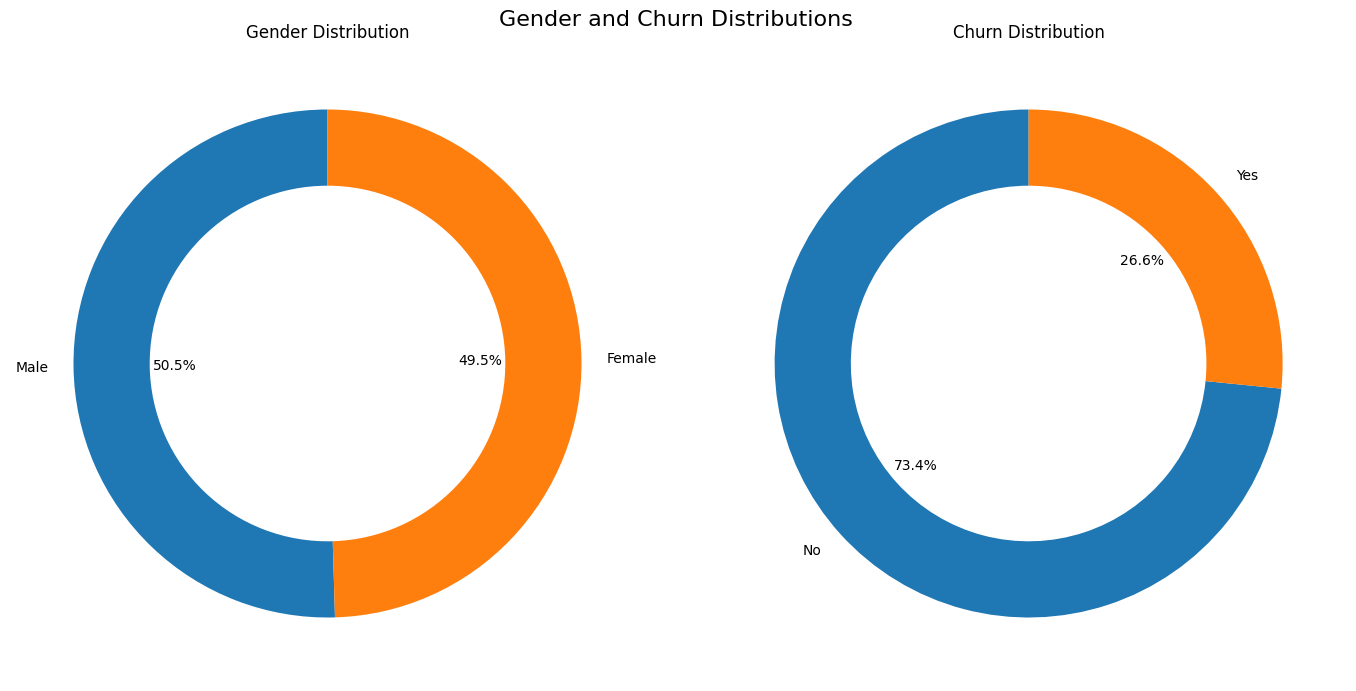

In [20]:
gender_counts=df["gender"].value_counts()
churn_counts = df['Churn'].value_counts()

g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

#     Gender Distribution
ax[0].pie(gender_counts, labels=g_labels, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3})
ax[0].set_title('Gender Distribution')

#    Churn percentage
ax[1].pie(churn_counts, labels=c_labels, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3})
ax[1].set_title('Churn Distribution')



plt.suptitle('Gender and Churn Distributions', fontsize=16)
plt.tight_layout()
plt.show()


* 26.6 % of customers switched to another firm.
* Customers are 49.5 % female and 50.5 % male.

In [21]:
categorical_columns = df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure',
                                       "PaymentMethod", "Contract", "gender",
                                       "InternetService", "StreamingTV", "StreamingMovies"]).columns

for cat in categorical_columns:
    fig = px.histogram(df, x=cat, color="Churn", barmode="group", title=f'Distribution of {cat} with respect to Churn',category_orders={cat: df[cat].unique()},color_discrete_sequence=px.colors.qualitative.Plotly) 
    fig.update_layout(xaxis_title=cat, yaxis_title='Count')
    fig.show()


## 🔍   

1. **Senior Citizens:**  
   The proportion of senior citizens is relatively small, but most of them tend to churn.

2. **Partner Status:**  
   Customers **without partners** are more likely to churn compared to those with partners.

3. **Dependents:**  
   Customers **without dependents** show a higher likelihood of churning.

4. **Phone Service:**  
   A very small portion of customers do not have phone service. Among those who **have multiple lines**, around **30% are more likely to churn**.

5. **Online Security:**  
   A significant number of customers churn when **online security is not provided**.

6. **Tech Support:**  
   Customers **without tech support** are among the most likely to switch to another service provider.

7. **Billing Preference:**  
   Customers using **paperless billing** are more likely to churn than those using traditional billing methods.


In [22]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [23]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

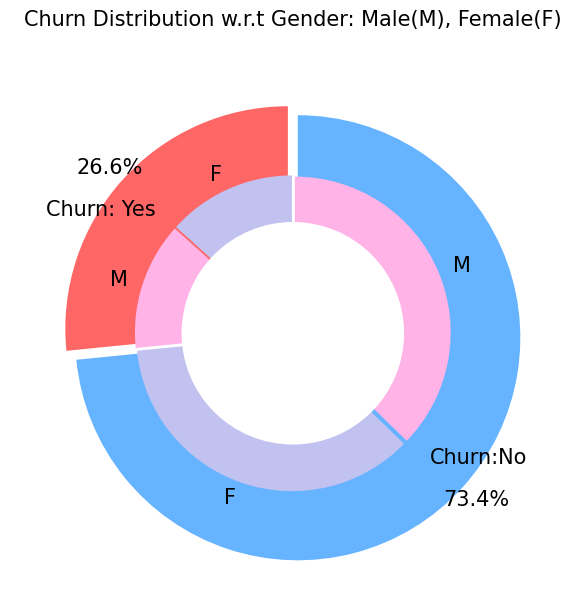

In [24]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

* There is negligible difference in customer percentage count who chnaged the service provider.

In [25]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

* About 70% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [26]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [27]:
fig=px.histogram(df,x="Churn",color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* The data shows that the people who most often leave the service are those who pay using **Electronic Check** as their payment method.
* Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.


In [28]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this mean there is problem with this service and  we shlould slove it .
* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service this mean that DSL wotking very good .

In [29]:
num_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

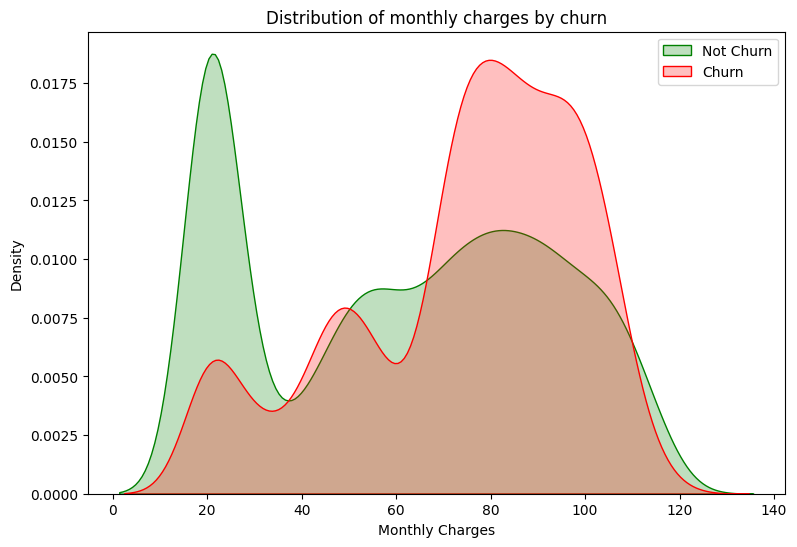

In [30]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Green",shade = True );
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Red" ,shade = True );
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');


* Customers with higher Monthly Charges are also more likely to churn

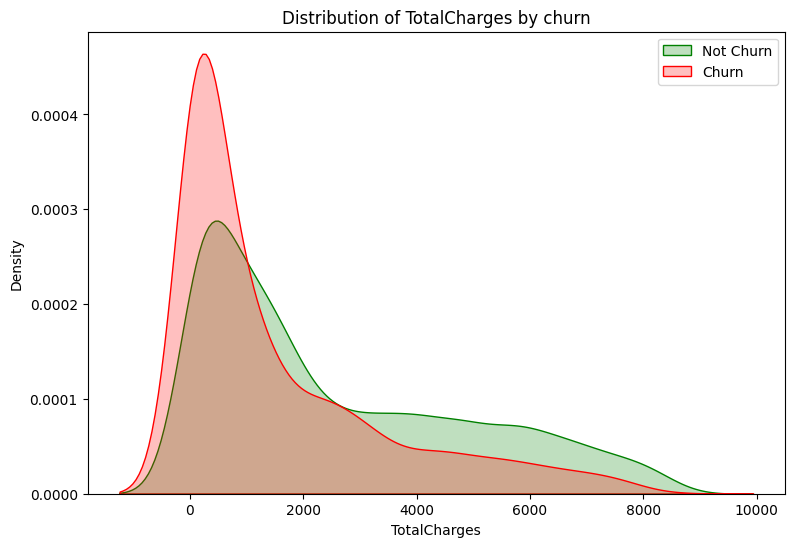

In [31]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Green",shade = True );
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Red" ,shade = True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_xlabel('TotalCharges');
ax.set_title('Distribution of TotalCharges by churn');


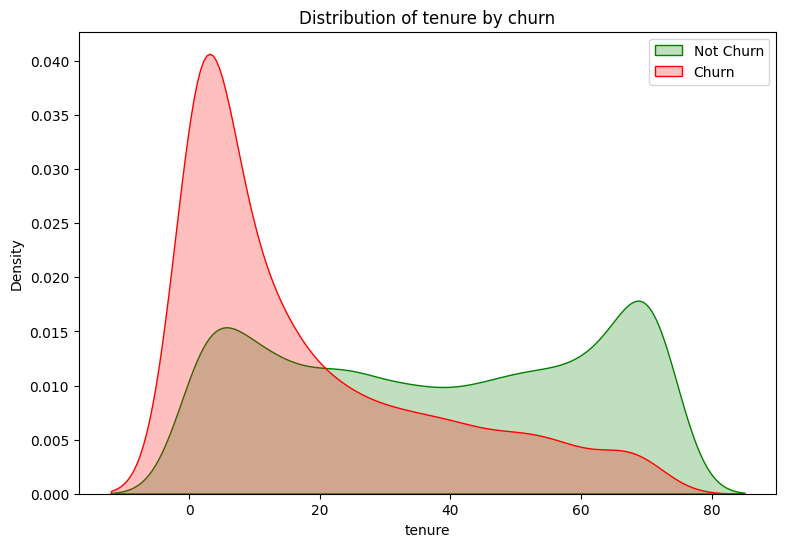

In [32]:
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'No') ],
                color="Green",shade = True );
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'Yes') ],
                ax =ax, color="Red" ,shade = True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_xlabel('tenure');
ax.set_title('Distribution of tenure by churn');


In [33]:
fig = px.box(df, x='Churn', y = 'tenure')

fig.show()


* New customers are more likely to churn

# Modeling

### Preprocessing

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score

In [35]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                    'PaymentMethod', 'Contract']

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

target_col = 'Churn'


In [36]:
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])



# Baseline Model

In [37]:
import mlflow


In [38]:

base_exp = mlflow.create_experiment(
    name="baseline_model",
    artifact_location="exp_artifacts",
    tags={"env": "dev", "version": "1.0.0"}
)

print(f"Experiment ID: {base_exp}")

Experiment ID: 424837063882009034


In [39]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

baseline_prediction = np.full_like(y, y.mode()[0])
baseline_accuracy = accuracy_score(y, baseline_prediction)
print(f'Baseline Model Accuracy: {baseline_accuracy:.2f}')

Baseline Model Accuracy: 0.73


In [40]:
with mlflow.start_run(run_name="logging_metrics", experiment_id=base_exp) as run:
    mlflow.log_metric("Accuracy", 0.73)

In [41]:
mlflow.end_run()

# Logistic Regression

In [42]:
logreg_exp = mlflow.create_experiment(
    name="logistic_regression",
    artifact_location="exp_artifacts",
    tags={"env": "dev", "version": "1.0.0"}
)

print(f"Experiment ID: {logreg_exp}")

Experiment ID: 228567432707757201


In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### Training

In [44]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

### Evaluation

In [45]:
print_score(clf, x_train, y_train, x_test, y_test, train=True)
print_score(clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 80.89%
_______________________________________________
CLASSIFICATION REPORT:
                    No          Yes  accuracy    macro avg  weighted avg
precision     0.851230     0.664577  0.808889     0.757903      0.801622
recall        0.896368     0.567224  0.808889     0.731796      0.808889
f1-score      0.873216     0.612053  0.808889     0.742635      0.803805
support    4130.000000  1495.000000  0.808889  5625.000000   5625.000000
_______________________________________________
Confusion Matrix: 
 [[3702  428]
 [ 647  848]]

Test Result:
Accuracy Score: 78.82%
_______________________________________________
CLASSIFICATION REPORT:
                    No         Yes  accuracy    macro avg  weighted avg
precision     0.835616    0.621795  0.788202     0.728706      0.778780
recall        0.885770    0.518717  0.788202     0.702243      0.788202
f1-score      0.859962    0.565598  0.788202     0.712780      0.781716
support    1033.000000  374.000000  

In [46]:
from mlflow.models import infer_signature
y_pred = pd.DataFrame(clf.predict(x_test), columns=["Churn"])
model_signature = infer_signature(model_input=x_train, model_output=y_pred)

mlflow.sklearn.log_model(sk_model=clf, 
                         artifact_path="logistic_regression_classifier_with_signature", 
                         signature=model_signature)


In [47]:
mlflow.end_run()

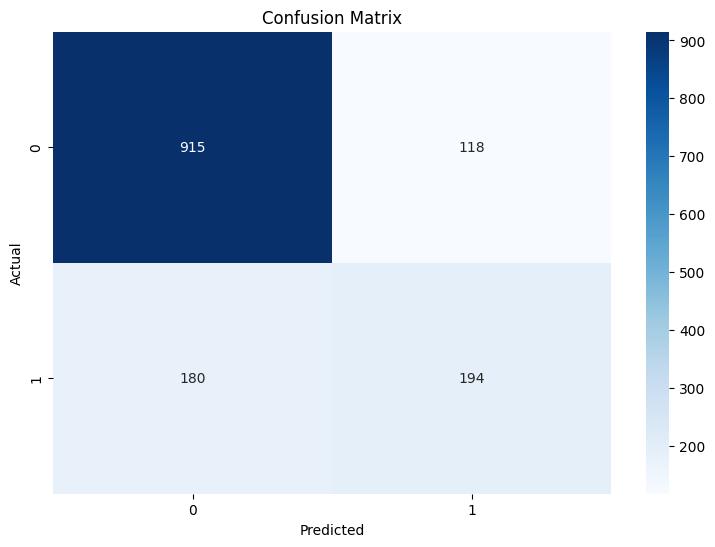

In [48]:
fig = plt.figure()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Confusion Matrix')


plt.show()

with mlflow.start_run(run_name="logging_artifacts", experiment_id=logreg_exp) as run:
    mlflow.log_figure(fig, "exp_artifacts/confusion_matrix_logreg.png")

In [49]:
mlflow.end_run()

### Hyperparameters tuning

In [50]:
logreg_finetune_exp = mlflow.create_experiment(
    name="logistic_regression_finetune",
    artifact_location="exp_artifacts",
    tags={"env": "dev", "version": "1.0.0"}
)

print(f"Experiment ID: {logreg_finetune_exp}")

Experiment ID: 400371046151358967


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear'],  # Supports both L1 and L2
    'classifier__class_weight': [None, 'balanced']
}
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)


grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(x_test)
y_proba = best_model.predict_proba(x_test)[:, 1]

from sklearn.metrics import accuracy_score, roc_auc_score



Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'classifier__C': 10, 'classifier__class_weight': None, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [52]:
hyperparameters = {'classifier__C': 10,
  'classifier__class_weight': None, 
  'classifier__penalty': 'l2',
  'classifier__solver': 'liblinear'}



with mlflow.start_run(run_name="logging_params", experiment_id=logreg_finetune_exp) as run:
    mlflow.log_params(hyperparameters)


In [53]:
print_score(best_model, x_train, y_train, x_test, y_test, train=True)
print_score(best_model, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 80.96%
_______________________________________________
CLASSIFICATION REPORT:
                    No          Yes  accuracy    macro avg  weighted avg
precision     0.851852     0.665884    0.8096     0.758868      0.802426
recall        0.896610     0.569231    0.8096     0.732920      0.809600
f1-score      0.873658     0.613776    0.8096     0.743717      0.804587
support    4130.000000  1495.000000    0.8096  5625.000000   5625.000000
_______________________________________________
Confusion Matrix: 
 [[3703  427]
 [ 644  851]]

Test Result:
Accuracy Score: 78.82%
_______________________________________________
CLASSIFICATION REPORT:
                    No         Yes  accuracy    macro avg  weighted avg
precision     0.836231    0.621019  0.788202     0.728625      0.779024
recall        0.884802    0.521390  0.788202     0.703096      0.788202
f1-score      0.859831    0.566860  0.788202     0.713346      0.781955
support    1033.000000  374.000000  

`Same results, no overfitting -> stable model`

In [54]:
with mlflow.start_run(run_name="logging_metrics", experiment_id=logreg_finetune_exp) as run:

    metrics = {
        "Train_Accuracy": 80.89,
        "Test_Accuracy":78.82
    }
    mlflow.log_metrics(metrics)

---

In [55]:
mlflow.end_run()

### Feature Importance (Using LogReg's Coefficients)

In [56]:
logreg_model = best_model.named_steps['classifier']


feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

# Get coefficients
coefficients = logreg_model.coef_[0]


coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients.round(2)
}).sort_values(by='Coefficient', ascending=False)

coef_df['Feature'] = coef_df['Feature'].str.replace('cat__','')
coef_df['Feature'] = coef_df['Feature'].str.replace('_',' -> ')

<Figure size 1000x600 with 0 Axes>

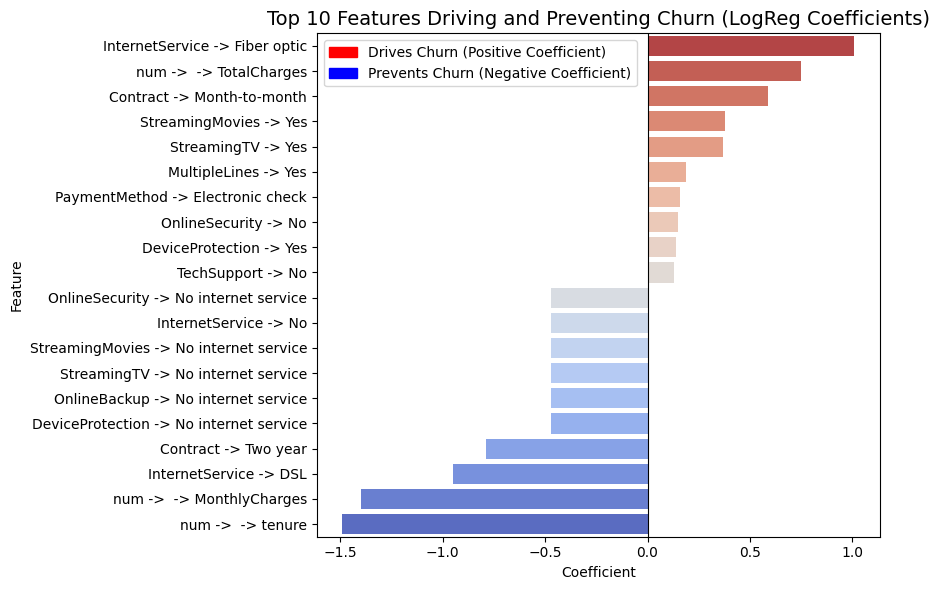

Red bars (positive coef): features that retain customers.
Blue bars (negative coef): features that increase churn risk.



In [57]:
# Sort by coefficient

sorted_coef = coef_df.sort_values(by='Coefficient', ascending= False)

# Select top 10 negative and top 10 positive
top_features = pd.concat([sorted_coef.head(10), sorted_coef.tail(10)])

# Plot

plt.figure(figsize=(10, 6))
fig = plt.figure()

sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm_r')
plt.title('Top 10 Features Driving and Preventing Churn (LogReg Coefficients)', fontsize=14)
plt.axvline(0, color='black', linewidth=0.8)
legend_elements = [plt.Rectangle((0,0), 1, 1, color='red', label='Drives Churn (Positive Coefficient)'),
                   plt.Rectangle((0,0), 1, 1, color='blue', label='Prevents Churn (Negative Coefficient)')]
plt.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
with mlflow.start_run(run_name="logging_artifacts", experiment_id=logreg_exp) as run:
    mlflow.log_figure(fig, "exp_artifacts/feature_importance_logreg.png")
plt.show()

print('''Red bars (positive coef): features that retain customers.
Blue bars (negative coef): features that increase churn risk.
''')


&nbsp;

## Hypotheses Tests
#### In this section we check the assumptions of Logistic Regression, to determine if it's the best choice out of all candidate models

### Testing the assumptions of Logistic Regression:
1. The Response Variable is Binary

2. Observations are independent
3. No Multicollinearity
4. No extreme outliers
5. There is a Linear Relationship Between Explanatory Variables and the Logit of the Response Variable
6. The Sample Size is Sufficiently Large

In [58]:
hypotheses_tests = mlflow.create_experiment(
    name="hypotheses_tests",  # Name of the experiment
    artifact_location="exp_artifacts",  # Updated location
    tags={"env": "dev", "version": "1.0.0"}  # Metadata tags for the experiment
)

# Print the experiment ID
print(f"Experiment ID: {hypotheses_tests}")

Experiment ID: 353910469610853495


In [59]:
from scipy import stats 


### Assumption 1: Binary Response Variable
Null hypothesis (H₀): The response variable is binary (i.e., only two classes).

Alternative hypothesis (H₁): The response variable is not binary (i.e., more than two classes).

In [60]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

### Assumption 2: Observations are Independent
### Chi-squared test of independece
Null hypothesis (H₀): There's no association between categories

Alternative hypothesis (H₁):  There's an association between categories

In [61]:
from scipy.stats import chi2_contingency

categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'InternetService', 'Contract','PaymentMethod', 'PaperlessBilling','MultipleLines']
for feature in categorical_features:
    contingency = pd.crosstab(df[feature], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square test for {feature} vs Churn: p-value = {p:.4f}")

    alpha = 0.05
    if p <= alpha:
        print(f"Result: Significant association (p ≤ {alpha}) - REJECT null hypothesis")
    else:
        print(f"Result: No significant association (p > {alpha}) - FAIL TO REJECT null hypothesis")

    print("-" * 50)

Chi-square test for gender vs Churn: p-value = 0.4905
Result: No significant association (p > 0.05) - FAIL TO REJECT null hypothesis
--------------------------------------------------
Chi-square test for SeniorCitizen vs Churn: p-value = 0.0000
Result: Significant association (p ≤ 0.05) - REJECT null hypothesis
--------------------------------------------------
Chi-square test for Partner vs Churn: p-value = 0.0000
Result: Significant association (p ≤ 0.05) - REJECT null hypothesis
--------------------------------------------------
Chi-square test for InternetService vs Churn: p-value = 0.0000
Result: Significant association (p ≤ 0.05) - REJECT null hypothesis
--------------------------------------------------
Chi-square test for Contract vs Churn: p-value = 0.0000
Result: Significant association (p ≤ 0.05) - REJECT null hypothesis
--------------------------------------------------
Chi-square test for PaymentMethod vs Churn: p-value = 0.0000
Result: Significant association (p ≤ 0.05) -

`There is dependence between categories,` `assumption is not satisfied`

<Figure size 900x600 with 0 Axes>

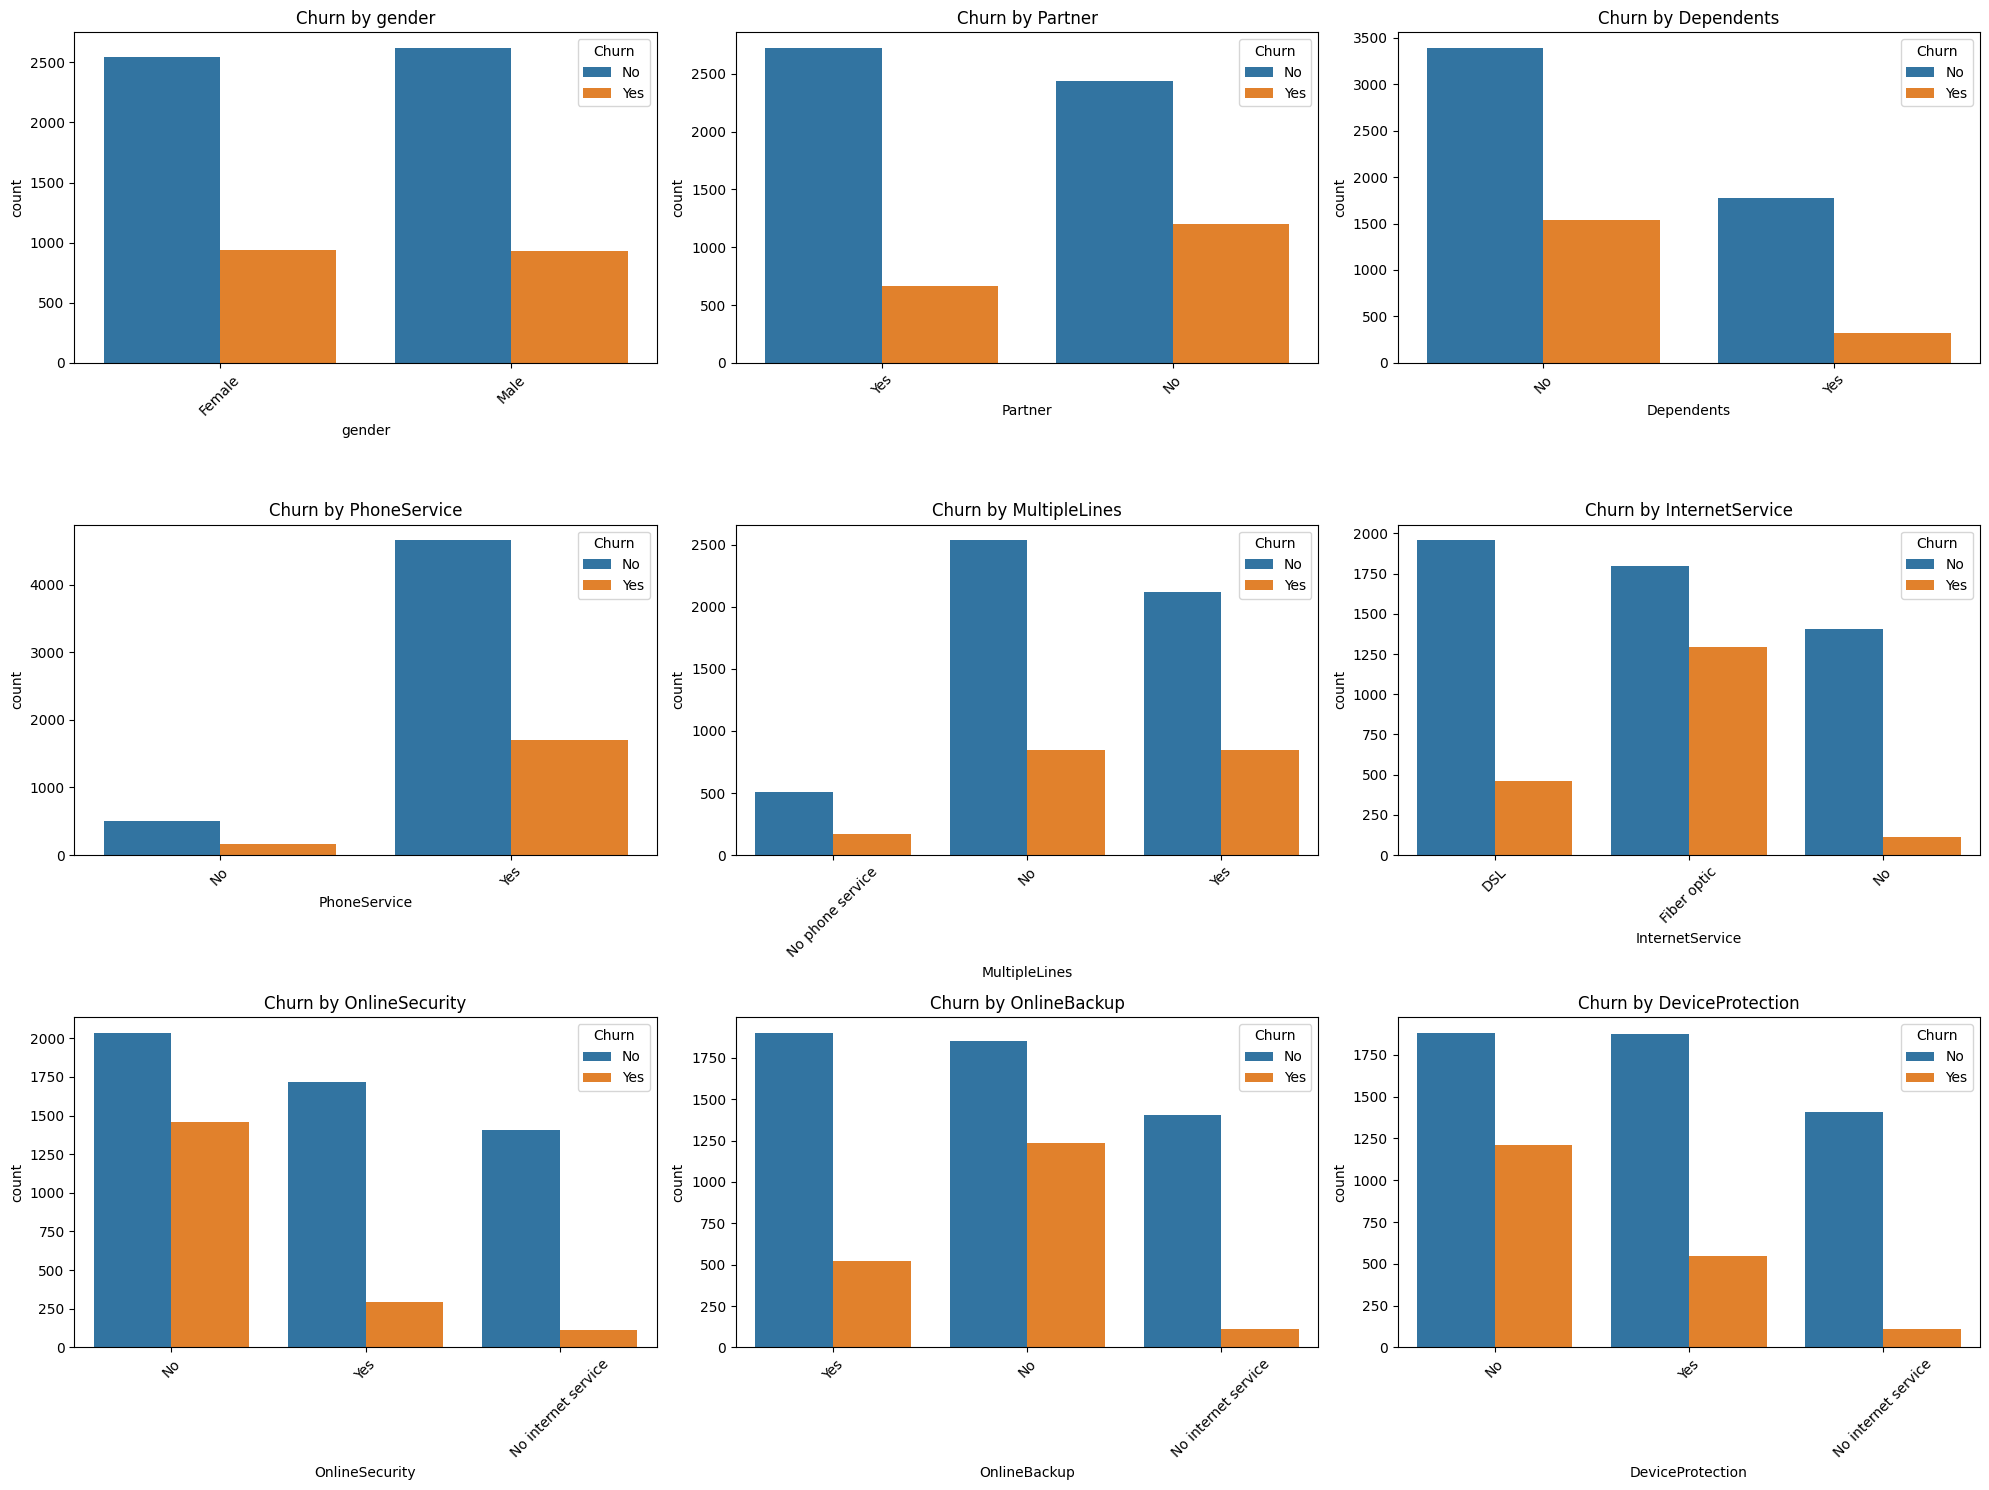

In [62]:
fig = plt.figure()
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_cols[:9]):  # Adjust to handle up to 9 features
    sns.countplot(data=df, x=feature, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Churn by {feature}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(len(categorical_cols[:9]), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
  
with mlflow.start_run(run_name="logging_artifacts", experiment_id=hypotheses_tests) as run:
    mlflow.log_figure(fig, "exp_artifacts/hypotheses_tests.png")
plt.show()

### Assumption 3: No Multicollinearity

Null hypothesis (H₀): There is no multicollinearity between categories

Alternative hypothesis (H₁): There's multicollinearity

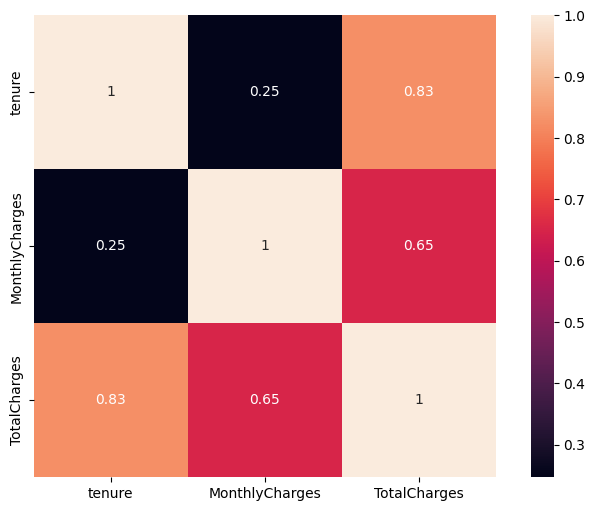

In [63]:
num_col = df.select_dtypes(include='number')
cat_col = df.select_dtypes(include='object')
fig = plt.figure()
sns.heatmap(num_col.corr(), annot=True,square=True)
with mlflow.start_run(run_name="logging_artifacts", experiment_id=hypotheses_tests) as run:
    mlflow.log_figure(fig, "exp_artifacts/heatmap.png")
plt.show()

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x_train.select_dtypes(include=[np.number])

vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,features,VIF
0,tenure,6.296818
1,MonthlyCharges,3.350089
2,TotalCharges,8.035735


`All features are below 10, no sign of multicollinearity.` `Assumption is Satisfed`.

### Assumption 4: There are No Extreme Outliers

Null hypothesis (H₀): No extreme outliers

Alternative hypothesis (H₁): There's extreme outliers

In [65]:
# Select only the numerical columns
num_col = df[numerical_cols]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = num_col.quantile(0.25)
Q3 = num_col.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Identify outliers
outliers = ((num_col < (Q1 - 1.5 * IQR)) | (num_col > (Q3 + 1.5 * IQR)))

# Display outliers
outliers.sum()


tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

<Figure size 900x600 with 0 Axes>

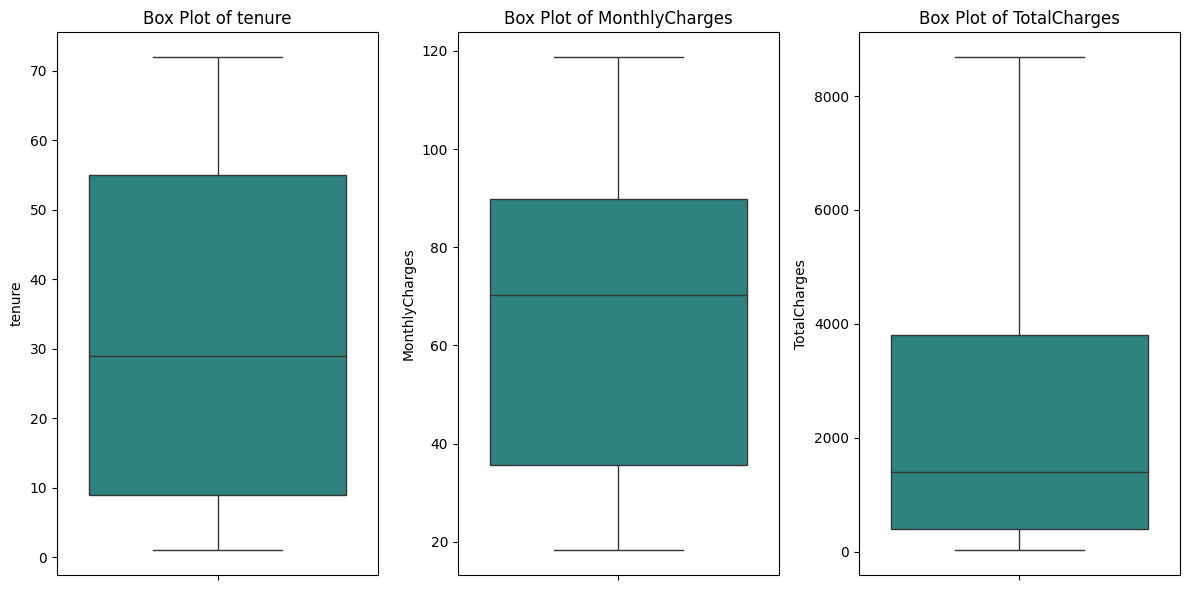

In [66]:
fig = plt.figure()

plt.figure(figsize=(12, 6))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=df[col], palette='viridis')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
with mlflow.start_run(run_name="logging_artifacts", experiment_id=logreg_exp) as run:
    mlflow.log_figure(fig, "exp_artifacts/boxplot.png")
plt.show()

`No extreme outliers`, `assumption is satisfied.`

### Assumption 5: There is a Linear Relationship Between Explanatory Variables and the Logit of the Response Variable

Null hypothesis (H₀): There is a Linear Relationship

Alternative hypothesis (H₁): There is no Linear Relationship

In [67]:
from statsmodels.api import Logit
import statsmodels.api as sm
df['Churn_Flag'] = (df['Churn'] == 'Yes').astype(int)
# Add a small constant to avoid log(0)
df['tenure_log'] = np.log(df['tenure'] + 1e-5) * df['tenure']
df['MonthlyCharges_log'] = np.log(df['MonthlyCharges'] + 1e-5) * df['MonthlyCharges']
df['TotalCharges_log'] = np.log(df['TotalCharges'] + 1e-5) * df['TotalCharges']

# Select numerical columns and their log-transformed interaction terms
X = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'tenure_log', 'MonthlyCharges_log', 'TotalCharges_log']]
X = sm.add_constant(X)  # Add constant for intercept
y = df['Churn_Flag']

# Fit logistic regression model
model = Logit(y, X).fit()

# Display summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.448576
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             Churn_Flag   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7025
Method:                           MLE   Df Model:                            6
Date:                Thu, 15 May 2025   Pseudo R-squ.:                  0.2253
Time:                        20:54:56   Log-Likelihood:                -3154.4
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7183      0.351     -2.047      0.041      -1.406      -0.031
tenur


**Logistic Regression Coefficients: Impact on Customer Churn**  


- **Intercept (const)** Baseline churn probability when all predictors are zero (not meaningful in reality).

- **Tenure** -> **Strong effect**: Each additional month reduces churn risk significantly.
- **MonthlyCharges** -> **No effect**: Bill size doesn’t influence churn.
- **TotalCharges** -> **Very weak effect**: Higher total spending *might* slightly increase churn risk.
- **Tenure_log** Math adjustment: Captures diminishing returns of tenure over time.
- **MonthlyCharges_log** -> **No effect**: Log-transformed bills still don’t matter.
- **TotalCharges_log**  -> **Borderline effect**: Possible weak trend that big spenders stay slightly longer.


**Key Insights from the Table**  
1. **Tenure is critical**: The only *strong, clear* predictor of churn.  

2. **Money isn’t predictive**: Monthly or total charges have negligible effects.  
3. **Log transforms are minor tweaks**: They adjust the math but don’t change conclusions.  


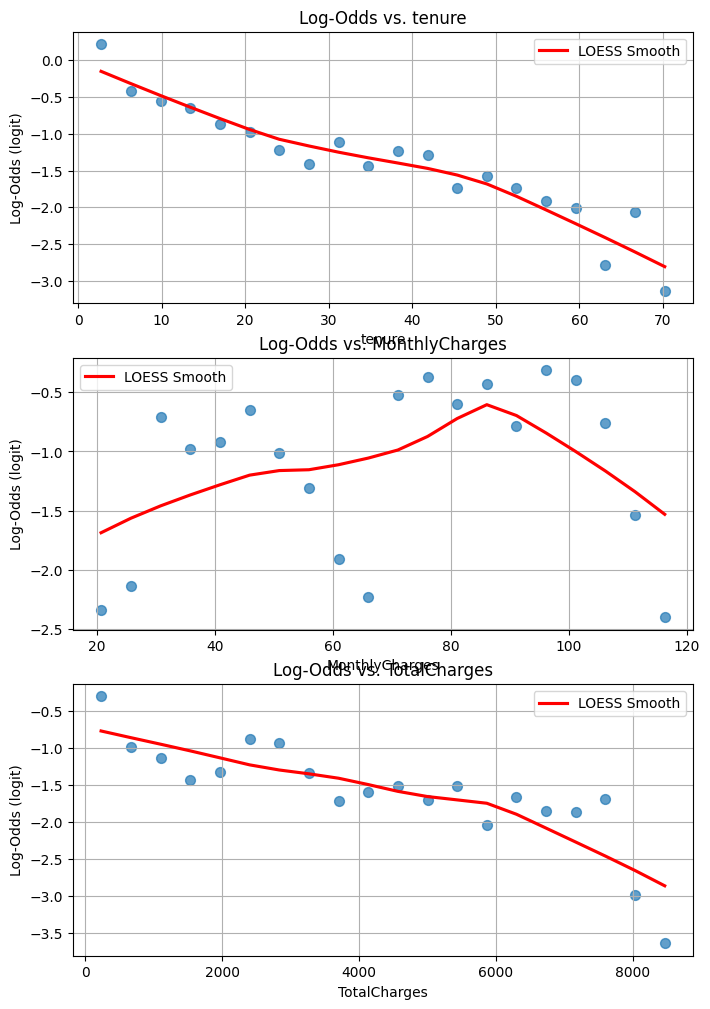

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

In [68]:
def plot_logodds_subplots(df, predictors, target='Churn_Flag', bins=20, figsize=(8, 12)):
    """
    Plots log-odds of target vs. multiple predictors in subplots.
    
    Args:
        df (pd.DataFrame): Input DataFrame.
        predictors (list): List of predictor column names.
        target (str): Target variable (default: 'Churn_Flag').
        bins (int): Number of bins for discretization (default: 20).
        figsize (tuple): Figure size (default: (15, 10)).
    """
    n_cols = 1  # Number of columns in subplot grid
    n_rows = (len(predictors) + n_cols - 1) // n_cols  # Calculate rows needed
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()  # Flatten for easy iteration
    
    for i, predictor in enumerate(predictors):
        ax = axes[i]
        
        # Bin the predictor and compute log-odds
        binned = pd.cut(df[predictor], bins=bins)
        logodds = df.groupby(binned)[target].agg(['mean', 'count'])
        logodds = logodds.rename(columns={'mean': 'prob'})
        
        # Handle edge cases (avoid log(0) or division by zero)
        logodds['prob'] = logodds['prob'].clip(1e-10, 1 - 1e-10)
        logodds['log_odds'] = np.log(logodds['prob'] / (1 - logodds['prob']))
        
        # Get bin midpoints for x-axis
        bin_midpoints = [interval.mid for interval in logodds.index]
        fig = plt.figure()

        # Plot
        sns.regplot(
            x=bin_midpoints,
            y=logodds['log_odds'],
            lowess=True,
            line_kws={'color': 'red', 'label': 'LOESS Smooth'},
            scatter_kws={'s': 50, 'alpha': 0.7, 'label': 'Binned Data'},
            ax=ax
        )
        
        ax.set_title(f"Log-Odds vs. {predictor}")
        ax.set_xlabel(predictor)
        ax.set_ylabel("Log-Odds (logit)")
        ax.legend()
        ax.grid(True)
    
    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    with mlflow.start_run(run_name="logging_artifacts", experiment_id=logreg_exp) as run:
        mlflow.log_figure(fig, "exp_artifacts/logodds_subplots.png")
    plt.show()

predictors = numerical_cols  
plot_logodds_subplots(df, predictors)

`There is linearity between some predictors (e.g., tenure) and the logit of the target, but not all (e.g., MonthlyCharges).` 

`Thus, the linearity assumption is not fully satisfied.` -> Could cause biased estimates and poor predictions.

### Assumption 6: The Sample Size is Sufficiently Large

Null hypothesis (H₀):

Alternative hypothesis (H₁):

Rule of Thumb:
You should have at least 10 observations per predictor variable (feature) for the least frequent outcome (Peduzzi et al., 1996).

Formula:

$$Minimum  Required Sample Size =(10 × Number of Predictors) / Proportion of the minority class $$

​
 


In [69]:
class_distribution = df['Churn'].value_counts(normalize=True)
print(class_distribution)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


In [70]:
n_predictors = df.shape[1]  # Number of features in your model
minority_proportion = class_distribution.min()  # 0.20 in this case

min_sample_size = (10 * n_predictors) / minority_proportion
print(f"Minimum required sample size: {min_sample_size:.0f}")

Minimum required sample size: 903


`Assumption is satisfied`.

In [71]:
mlflow.end_run()

&nbsp;



### Key Insights and Summarization:-

### Feature Importance:



**Positive Coefficients (More Likely to Churn)**

| Feature                     | Coefficient          |  Meaning                                                                                |
| --------------------------- | -------------------- | ---------------------------------------------------------------------------------------------- |
| **Fiber Optic Internet**    | **+1.01**            | Huge churn driver. Could reflect dissatisfaction with price or reliability.                    |
| **High TotalCharges**       | **+0.75**            | High spenders might feel the pinch or expect premium service — churn if they feel underserved. |
| **Month-to-Month Contract** | **+0.59**            | Classic churn risk — no strings attached, easy to leave.                                       |
| **Streaming Services**      | **+0.37**, **+0.38** | These features may raise customer expectations. If unmet, users churn.                         |
| **Electronic Payment**      | **+0.13 to +0.19**   | Digital-native users may be quicker to switch or try alternatives.                             |
| **Other Mild Positives**    | **+0.08 to +0.16**   | These could be demographic or usage patterns reflecting lighter commitment.                    |



**Negative Coefficients (Less Likely to Churn)**

| Feature                                    | Coefficient        |  Meaning                                                                |
| ------------------------------------------ | ------------------ | ------------------------------------------------------------------------------ |
| **Long Tenure**                            | **-1.49**          | Most powerful loyalty signal. Longevity matters.                               |
| **Low Monthly Charges**                    | **-1.40**          | Affordability drives retention — satisfied customers stick around.             |
| **DSL Internet**                           | **-0.95**          | Possibly older, stable customers with less interest in switching.              |
| **Two-Year Contract**                      | **-0.79**          | Strong lock-in — long-term deals work.                                         |
| **Auto-Pay (Credit card / Bank transfer)** | **-0.22 to -0.24** | Reduces effort to leave. Inertia builds loyalty.                               |
| **Having a Partner / Being Female**        | **-0.16**          | Possibly tied to more stable usage or risk-averse behavior. Just a hypothesis. |
| **Other Stable Users**                     | **-0.47 to -0.06** | Includes demographics or feature combos associated with low churn likelihood.  |

---

### Evaluation:
First Evaluation: 80.2 accuracy, 80.6 ROC-AUC

A a strong result. The model is discriminating well between churners and non-churners.

Second Evaluation (After hyperparameter tuning): 80.2 accuracy, 80.6 ROC-AUC

Same Result. `The model is stable` and there are no signs of overfitting

---

### Conclusion:
Although in terms of accuracy our model performed decently, but after hypotheses testing we found out that `two out of the six assumptions were not satisfied which are the independence of features and linearity between predictors and target variable`.

Thus, we need another model that does not assume that failed assumption. A `tree-based model` would the one to choose.


# Random Forest

### Training

In [72]:
rf_exp = mlflow.create_experiment(
    name="Random_Forest",
    artifact_location="exp_artifacts",
    tags={"env": "dev", "version": "1.0.0"}
)

print(f"Experiment ID: {rf_exp}")

Experiment ID: 952176161504023583


In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('model', RandomForestClassifier(random_state=42, class_weight='balanced'))
])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=42)

rf_clf.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'Contract'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [74]:
print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 99.80%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.998893     0.995420  0.997968     0.997156      0.997970
recall        0.998340     0.996942  0.997968     0.997641      0.997968
f1-score      0.998616     0.996180  0.997968     0.997398      0.997969
support    3614.000000  1308.000000  0.997968  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3608    6]
 [   4 1304]]

Test Result:
Accuracy Score: 78.25%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.820966    0.623786  0.782464     0.722376      0.768540
recall        0.899935    0.458111  0.782464     0.679023      0.782464
f1-score      0.858639    0.528263  0.782464     0.693451      0.770800
support    1549.000000  561.000000  

In [75]:
with mlflow.start_run(run_name="logging_metrics", experiment_id=rf_exp) as run:

    metrics = {
        "Train_Accuracy": 99.80,
        "Test_Accuracy":78.25
    }
    mlflow.log_metrics(metrics)

In [76]:
y_pred = pd.DataFrame(rf_clf.predict(x_test), columns=["Churn"])
model_signature = infer_signature(model_input=x_train, model_output=y_pred)

mlflow.sklearn.log_model(sk_model=rf_clf, 
                         artifact_path="random_forest_classifier_with_signature", 
                         signature=model_signature)

In [77]:
mlflow.end_run()

`Obvious case of overfitting`

### Hyperparameter Tuning

In [78]:
rf_finetune_exp = mlflow.create_experiment(
    name="Random_Forest_Finetune",
    artifact_location="exp_artifacts",
    tags={"env": "dev", "version": "1.0.0"}
)

print(f"Experiment ID: {rf_exp}")

Experiment ID: 952176161504023583


In [79]:
from skopt import BayesSearchCV
from skopt.space import Integer, Real

search_space_rf = {
    'model__n_estimators': Integer(100, 1000),  
    'model__max_depth': Integer(10, 100),      
    'model__min_samples_split': Integer(2, 50), 
    'model__min_samples_leaf': Integer(1, 50),   
    'model__max_features': Real(0.1, 1.0, prior='uniform')  
}

bayes_search_rf = BayesSearchCV(
    rf_clf,
    search_space_rf,
    n_iter=100,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

bayes_search_rf.fit(x_train, y_train)

best_rf_model = bayes_search_rf.best_estimator_
print("Best Parameters:", bayes_search_rf.best_params_)

y_pred_rf_bayes = best_rf_model.predict(x_test)
y_proba_rf_bayes = best_rf_model.predict_proba(x_test)[:, 1]

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [80]:
hyperparameters = {
    'model__max_depth': 10,
    'model__max_features': 0.1,
    'model__min_samples_leaf': 10,
    'model__min_samples_split': 2,
    'model__n_estimators': 1000
}

with mlflow.start_run(run_name="logging_params", experiment_id=rf_finetune_exp) as run:
    mlflow.log_params(hyperparameters)

In [81]:
print_score(best_rf_model, x_train, y_train, x_test, y_test, train=True)
print_score(best_rf_model, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 79.68%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.930784     0.581568  0.796831     0.756176      0.837982
recall        0.781406     0.839450  0.796831     0.810428      0.796831
f1-score      0.849579     0.687109  0.796831     0.768344      0.806403
support    3614.000000  1308.000000  0.796831  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[2824  790]
 [ 210 1098]]

Test Result:
Accuracy Score: 74.41%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.899446    0.512397  0.744076     0.705921      0.796538
recall        0.733376    0.773619  0.744076     0.753497      0.744076
f1-score      0.807966    0.616477  0.744076     0.712222      0.757053
support    1549.000000  561.000000  

In [82]:
with mlflow.start_run(run_name="logging_metrics", experiment_id=rf_finetune_exp) as run:

    metrics = {
        "Train Accuracy": 79.68,
        "Test Accuracy": 74.41
    }
    mlflow.log_metrics(metrics)

# XGBoost

### Why is XGBoost any different from Random Forest that was used earlier?
Because decision trees are prone to overfitting,
ensemble methods, like boosting, can often be used to create more robust models. Boosting combines multiple individual weak trees—that is, models that perform slightly better than random chance, to form a strong learner. Each weak learner is trained sequentially to correct the errors made by the previous models. After hundreds of iterations, weak learners are converted into strong learners.

Random forests are based on the concept of bagging (bootstrap aggregating) and train each tree independently to combine their predictions, while boosting algorithms use an additive approach where weak learners are sequentially trained to correct the previous models’ mistakes. Source: [IBM](https://www.ibm.com/think/topics/xgboost)

In [83]:
xgboost_exp = mlflow.create_experiment(
    name="xgboost",
    artifact_location="exp_artifacts",
    tags={"env": "dev", "version": "1.0.0"}
)

print(f"Experiment ID: {xgboost_exp}")

Experiment ID: 488487483798224750


In [84]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score,matthews_corrcoef,precision_score, recall_score, f1_score, accuracy_score
from sklearn.pipeline import Pipeline


xgb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, 
                                  objective='binary:logistic', use_label_encoder=False, eval_metric='logloss'))
])


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_clf.fit(x_train, y_train)


preds = xgb_clf.predict(x_test)

In [85]:
print_score(xgb_clf, x_train, y_train, x_test, y_test, train=True)
print_score(xgb_clf, x_train, y_train, x_test, y_test, train=False)



Train Result:
Accuracy Score: 82.15%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.853780     0.703397  0.821511     0.778588      0.813811
recall        0.913317     0.567893  0.821511     0.740605      0.821511
f1-score      0.882546     0.628423  0.821511     0.755485      0.815006
support    4130.000000  1495.000000  0.821511  5625.000000   5625.000000
_______________________________________________
Confusion Matrix: 
 [[3772  358]
 [ 646  849]]

Test Result:
Accuracy Score: 79.32%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.833633    0.640678  0.793177     0.737156      0.782343
recall        0.897386    0.505348  0.793177     0.701367      0.793177
f1-score      0.864336    0.565022  0.793177     0.714679      0.784774
support    1033.000000  374.000000  

In [86]:
with mlflow.start_run(run_name="logging_metrics", experiment_id=xgboost_exp) as run:

    metrics = {
        "Train_Accuracy": 82.15,
        "Test_Accuracy":79.32
    }
    mlflow.log_metrics(metrics)

In [87]:
y_pred = pd.DataFrame(xgb_clf.predict(x_test), columns=["Churn"])
model_signature = infer_signature(model_input=x_train, model_output=y_pred)

mlflow.sklearn.log_model(sk_model=xgb_clf, 
                         artifact_path="xgboost_classifier_with_signature", 
                         signature=model_signature)

## Hyperparameter Tuning

In [88]:

xgboost_finetune_exp = mlflow.create_experiment(
    name="xgboost_finetune",
    artifact_location="exp_artifacts",
    tags={"env": "dev", "version": "1.0.0"}
)

print(f"Experiment ID: {xgboost_finetune_exp}")

Experiment ID: 285753048138792579


In [89]:
search_space_xgb = {
    'classifier__n_estimators': Integer(50, 2000),
    'classifier__max_depth': Integer(2, 30),
    'classifier__learning_rate': Real(0.001, 0.5, prior='log-uniform'),
    'classifier__subsample': Real(0.3, 1.0), 
    'classifier__colsample_bytree': Real(0.3, 1.0),
    'classifier__gamma': Real(0, 10),
    'classifier__min_child_weight': Integer(1, 50),
    'classifier__reg_alpha': Real(0, 10),         # Add L1 regularization term
    'classifier__reg_lambda': Real(0, 10)         # Add L2 regularization term
}


bayes_search_xgb = BayesSearchCV(
    xgb_clf,  
    search_space_xgb,
    n_iter=200,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

bayes_search_xgb.fit(x_train, y_train)


best_xgb_model = bayes_search_xgb.best_estimator_
print("Best Parameters:", bayes_search_xgb.best_params_)




Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [91]:
mlflow.end_run()

In [92]:
hyperparameters = {
    'classifier__colsample_bytree': 1.0,
    'classifier__gamma': 5.017744205254619,
    'classifier__learning_rate': 0.014721085155386152,
    'classifier__max_depth': 2,
    'classifier__min_child_weight': 41,
    'classifier__n_estimators': 2000,
    'classifier__reg_alpha': 0.0, 
    'classifier__reg_lambda': 5.888897005832292,
    'classifier__subsample': 0.3
}

with mlflow.start_run(run_name="logging_params", experiment_id=xgboost_finetune_exp) as run:
    mlflow.log_params(hyperparameters)

In [93]:
y_pred_xgb_bayes_expanded = best_xgb_model.predict(x_test)
y_proba_xgb_bayes_expanded = best_xgb_model.predict_proba(x_test)[:, 1]
print_score(best_xgb_model, x_train, y_train, x_test, y_test, train=True)
print_score(best_xgb_model, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 81.32%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.851404     0.678457  0.813156     0.764930      0.805438
recall        0.903148     0.564548  0.813156     0.733848      0.813156
f1-score      0.876513     0.616283  0.813156     0.746398      0.807350
support    4130.000000  1495.000000  0.813156  5625.000000   5625.000000
_______________________________________________
Confusion Matrix: 
 [[3730  400]
 [ 651  844]]

Test Result:
Accuracy Score: 79.67%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.838009    0.645695  0.796731     0.741852      0.786889
recall        0.896418    0.521390  0.796731     0.708904      0.796731
f1-score      0.866230    0.576923  0.796731     0.721577      0.789328
support    1033.000000  374.000000  

In [94]:
mlflow.end_run()

In [95]:
with mlflow.start_run(run_name="logging_metrics", experiment_id=xgboost_finetune_exp) as run:
    
    metrics = {
        "Train_Accuracy": 81.32,
        "Test_Accuracy":79.67
    }
    mlflow.log_metrics(metrics)

- Fine-tuning led to a minor drop in accuracy (79.32% → 79.67%) but improved recall for churners (50.5% → 52.1%). `This tradeoff enhances the model’s ability to detect at-risk customers,` which is more valuable in churn prevention.


# Modeling Overview

## Logistic Regression

### Results 
**Train Result:** Accuracy Score: 80.96%

**Test Result:** Accuracy Score: 78.82%

**Recall**: 88%
### Conclusion
Logistic Regression made a very strong results and could be a good candidate. However, as a result of testing the properties that Logistic Regression by nature assumes, it might not be the best choice for the data provided.

---
## Random Forest

### Results (after fine-tuning)
**Train Result:** Accuracy Score: 79.68%

**Test Result:** Accuracy Score: 74.41%

**Recall**: 73%
### Conclusion
Random Forest, as a tree-based model, did not show results that were expected to be better than Logistic Regression. Maybe being based on the concept of `bagging` made us consider another algorithm that is tree-based but works in a different way.

---
## XGboost
## Results (after fine-tuning)
**Train Result:** Accuracy Score: 82.15%

**Test Result:** Accuracy Score: 79.32%

**Recall:** 89%
## Conclusion
XGboost showed us a slightly better performance than Logistic Regression in both accuracy and recall.

XGBoost offers a wider range of hyperparameters than Logistic Regression, which allows for more flexible tuning and performance optimization, especially in complex, non-linear datasets. However, this comes at the cost of increased model complexity and computational overhead. Making them both strong candidates depending on resources.